## MODELOS DE SERIES DE TIEMPO (ARIMA) PARA FORECAST DE DEMANDA DE GAS NATURAL EN SECTOR ELÉCTRICO EN MÉXICO 
## UNAM POSGRAO EN INGENIERÍA 
## Alumno: Ibarra Ramírez Sergio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from sympy import true
from datetime import datetime, timedelta
register_matplotlib_converters()
from time import time 


Se lee la data "original" de Demanda en sector eléctrico 

In [2]:
csv_demanda_electrico_original = pd.read_csv('Demanda_electrico_2022_full1.csv',index_col='Date',parse_dates=True)
csv_demanda_electrico_original

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2022-05-01,3350.03
2022-06-01,3498.70
2022-07-01,3350.97


In [3]:
#for row in csv_demanda_electrico_original.iterrows():
#    print(row)

Se grafica la data "original" de Demanda en sector eléctrico 

Text(0, 0.5, 'Demanda [MMpcd]')

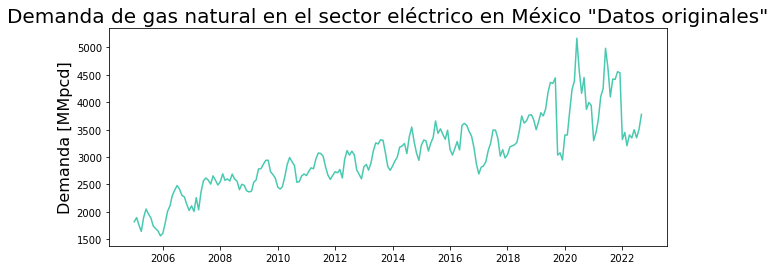

In [4]:
plt.figure(figsize=(10,4))
plt.plot(csv_demanda_electrico_original, color='#48C9B0')
plt.title('Demanda de gas natural en el sector eléctrico en México "Datos originales"', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)

Se descompone la data "original" de Demanda en sector eléctrico  en sus compoentes de Tendencia, Estacionalidad y Residual

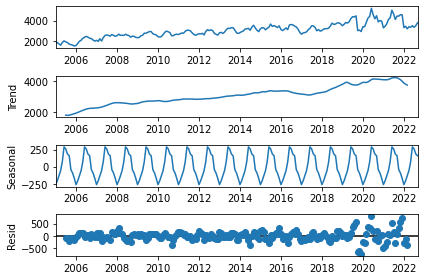

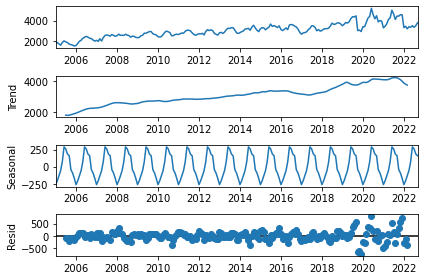

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

demanda_electrico_original_seasonal_decomposition = seasonal_decompose(csv_demanda_electrico_original, period=12)
demanda_electrico_original_seasonal_decomposition.plot()

Se lleva a cabo la prueba de estacionariedad de Dickey-Fulley a la data "original" de Demanda en sector eléctrico

En la prueba DF H0 que establece que la serie NO es estacionaria. Es decir que el valor de la Unit Root p=1 y por lo tanto la serie es una especie de ruido blanco. Ha: Establece qe p<1 y por lo tanto la serie tiene un componente determinístico que la hace tender hacia un valor medio

In [6]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Perform ADF test for stationarity
adf_test_electrico_original_sin_diferenciar = adfuller(csv_demanda_electrico_original)


adf_test_electrico_original_sin_diferenciar

(-1.9362234591018295,
 0.3152169397511435,
 15,
 197,
 {'1%': -3.463987334463603,
  '5%': -2.8763259091636213,
  '10%': -2.5746515171738515},
 2667.963876967698)

In [7]:
print(f"The ADF statistic value f is: {adf_test_electrico_original_sin_diferenciar[0]}")

print(f"The ADF p value p is: {adf_test_electrico_original_sin_diferenciar[1]}")

if adf_test_electrico_original_sin_diferenciar[0] < adf_test_electrico_original_sin_diferenciar[4]['5%']:
    print("Se rechaza H0: SI existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de SI estacionariedad")
else:
    print("Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de NO estacionariedad")

The ADF statistic value f is: -1.9362234591018295
The ADF p value p is: 0.3152169397511435
Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de NO estacionariedad


Se elaboran las gráficas de ACF y PACF de la data "original" de Demanda en sector eléctrico

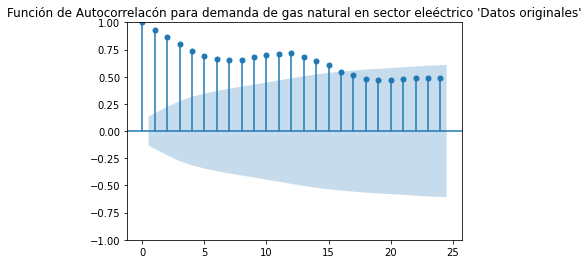

In [8]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(csv_demanda_electrico_original.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para demanda de gas natural en sector eleéctrico 'Datos originales'")

# Show the plot
plt.show()

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


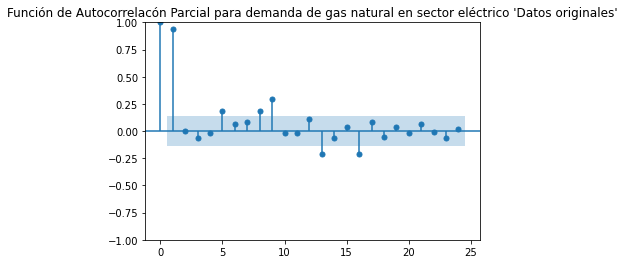

In [9]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(csv_demanda_electrico_original.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para demanda de gas natural en sector eléctrico 'Datos originales'")

# Show the plot
plt.show()

Se procede entonces a diferenciar la serie de data "original" de Demanda en sector eléctrico para lograr estacionariedad 

In [10]:
demanda_electrico_original_diff1 = csv_demanda_electrico_original.diff()
demanda_electrico_original_diff1

,Demanded_Gas
Date,
2005-01-01,NaN
2005-02-01,75.75
2005-03-01,-129.47
2005-04-01,-123.16
2005-05-01,252.84
...,...
2022-05-01,-53.41
2022-06-01,148.67
2022-07-01,-147.73


Se grafica la diferencia de la la serie de data "original" de Demanda en sector eléctrico

Text(0, 0.5, ' Diferencia Demanda [MMpcd]')

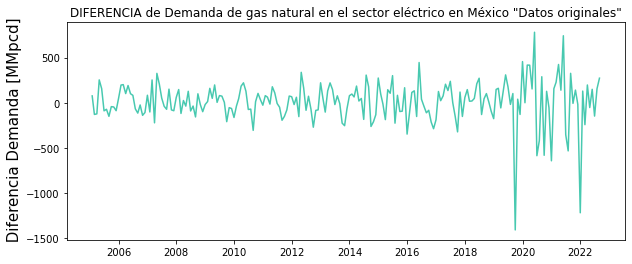

In [11]:
plt.figure(figsize=(10,4))
plt.plot(demanda_electrico_original_diff1, color='#48C9B0')
plt.title('DIFERENCIA de Demanda de gas natural en el sector eléctrico en México "Datos originales"')
plt.ylabel(' Diferencia Demanda [MMpcd]', fontsize =15)

Se lleva a cabo la prueba de estacionariedad de Dickey-Fulley a la DIFERENCIA1 Demanda de gas natural en el sector eléctrico en México "Datos originales"

In [12]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Check for infinite or NaN values
demanda_electrico_original_diff1.dropna(inplace=True)

# Perform ADF test
adf_test_electrico_original_diferencia1 = adfuller(demanda_electrico_original_diff1)


adf_test_electrico_original_diferencia1

(-4.063276407512036,
 0.0011131147894365412,
 15,
 196,
 {'1%': -3.464161278384219,
  '5%': -2.876401960790147,
  '10%': -2.5746921001665974},
 2657.205881461088)

In [13]:
print(f"The ADF statistic value f is: {adf_test_electrico_original_diferencia1[0]}")

print(f"The ADF p value p is: {adf_test_electrico_original_diferencia1[1]}")

if adf_test_electrico_original_diferencia1[0] < adf_test_electrico_original_diferencia1[4]['5%']:
    print("Se rechaza H0: SI existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de SI estacionariedad")
else:
    print("Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de NO estacionariedad")

The ADF statistic value f is: -4.063276407512036
The ADF p value p is: 0.0011131147894365412
Se rechaza H0: SI existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de SI estacionariedad


Se elaboran las gráficas de ACF y PACF de la DIFERENCIA de Demanda de gas natural en el sector eléctrico en México

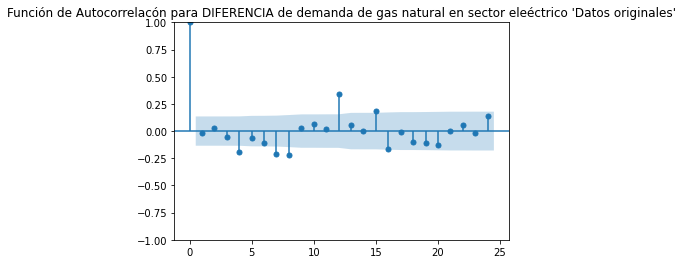

In [14]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(demanda_electrico_original_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para DIFERENCIA de demanda de gas natural en sector eleéctrico 'Datos originales'")

# Show the plot
plt.show()

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


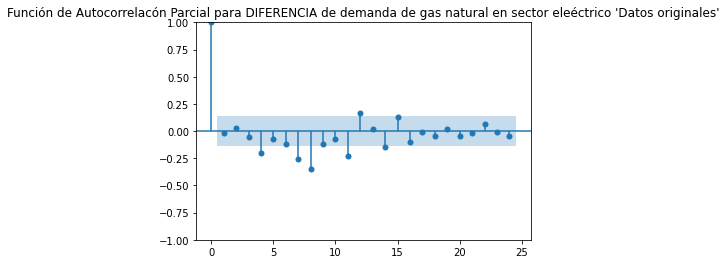

In [15]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(demanda_electrico_original_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para DIFERENCIA de demanda de gas natural en sector eleéctrico 'Datos originales'")

# Show the plot
plt.show()

Separamos la Demanda de gas natural en el sector eléctrico en data de train y test

In [16]:
# Number of data points to keep for testing (in this case, the last 12)
num_test_points = 12

# Split the data into training and testing sets
demanda_electrico_original_train_data = csv_demanda_electrico_original[:-num_test_points]
demanda_electrico_original_test_data = csv_demanda_electrico_original[-num_test_points:]

demanda_electrico_original_train_data

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2021-05-01,4243.93
2021-06-01,4985.53
2021-07-01,4631.85


Se grafica la distribución de la data "original" de Demanda en sector eléctrico

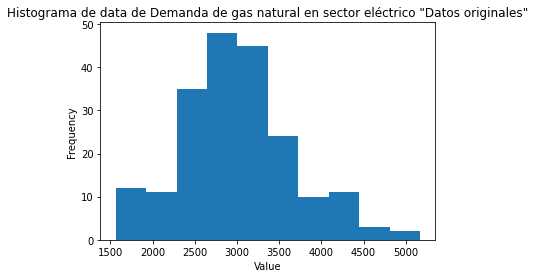

In [17]:
# Generate the histogram
plt.hist(demanda_electrico_original_train_data, bins=10)  # Adjust the number of bins as per your data

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograma de data de Demanda de gas natural en sector eléctrico "Datos originales"')

# Display the plot
plt.show()

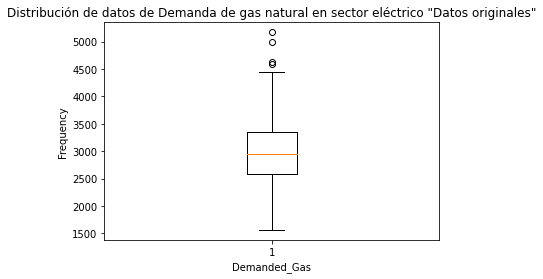

In [18]:
# Create a boxplot of the Demanded_Gas column
plt.boxplot(demanda_electrico_original_train_data)

# Add labels and title
plt.xlabel('Demanded_Gas')
plt.ylabel('Frequency')
plt.title('Distribución de datos de Demanda de gas natural en sector eléctrico "Datos originales"')

# Display the plot
plt.show()

Apliquemos un modelo ARIMA a nuestra data "original" de Demanda en sector eléctrico

In [19]:

##Create the model
model_ARIMA_electrico_original = ARIMA (demanda_electrico_original_train_data, order=(4,1,4))

##Fit the model
start = time()
model_ARIMA_electrico_original_fit = model_ARIMA_electrico_original.fit()
end = time()
print('Model fitting time', end-start)

##Summary of the model 
print(model_ARIMA_electrico_original_fit.summary())


c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Model fitting time 0.8544454574584961
                               SARIMAX Results                                
Dep. Variable:           Demanded_Gas   No. Observations:                  201
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -1333.392
Date:                Fri, 29 Sep 2023   AIC                           2684.783
Time:                        13:09:03   BIC                           2714.468
Sample:                    01-01-2005   HQIC                          2696.796
                         - 09-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8308      0.074     11.229      0.000       0.686       0.976
ar.L2         -0.4263      0.067     -6.332      0.000      -0.558      -0.294
ar.L3         

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Hagamos predicciones con el modelo ARIMA para la Demanda de gas natural en sector eleéctrico 'Datos originales'

In [20]:
##get prediction start and end dates 
pred_model_ARIMA_electrico_start_date = demanda_electrico_original_test_data.index[0]
pred_model_ARIMA_electrico_end_date = demanda_electrico_original_test_data.index[-1]

##get the predictors and residuals 
predictions_model_ARIMA_electrico_original = model_ARIMA_electrico_original_fit.predict(start=pred_model_ARIMA_electrico_start_date, end= pred_model_ARIMA_electrico_end_date)
print(predictions_model_ARIMA_electrico_original)

2021-10-01    4116.760353
2021-11-01    3938.306019
2021-12-01    4073.956534
2022-01-01    3890.889753
2022-02-01    3786.363557
2022-03-01    4046.456309
2022-04-01    4033.246030
2022-05-01    3975.558960
2022-06-01    4247.672609
2022-07-01    4266.689838
2022-08-01    4127.559924
2022-09-01    4289.069773
Freq: MS, Name: predicted_mean, dtype: float64


Text(0, 0.5, 'Demanda [MMpcd]')

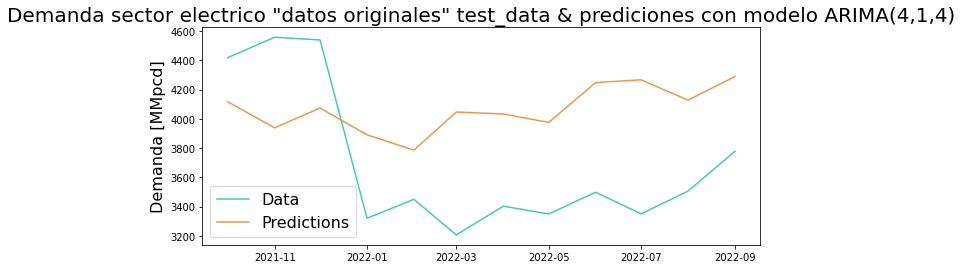

In [21]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_original_test_data, color='#48C9B0')
plt.plot(predictions_model_ARIMA_electrico_original, color='#EB984E')
plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Demanda sector electrico "datos originales" test_data & prediciones con modelo ARIMA(4,1,4)', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Cuantificando el error de las predicciones con el modelo ARIMA para la Demanda de gas natural en sector eleéctrico 'Datos originales'

In [22]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute errors
MAPE_predictions_model_ARIMA_electrico_original = mean_absolute_percentage_error(demanda_electrico_original_test_data, predictions_model_ARIMA_electrico_original)
RMSE_predictions_model_ARIMA_electrico_original = np.sqrt(mean_squared_error(demanda_electrico_original_test_data, predictions_model_ARIMA_electrico_original))

print('MAPE:', MAPE_predictions_model_ARIMA_electrico_original)
print('RMSE:', RMSE_predictions_model_ARIMA_electrico_original)

MAPE: 0.16739974297359148
RMSE: 623.6320827738078


In [23]:
# Create a copy of the original DataFrame
demanda_electrico_original_train_data_para_tratamiento = demanda_electrico_original_train_data.copy()
demanda_electrico_original_train_data_para_tratamiento

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2021-05-01,4243.93
2021-06-01,4985.53
2021-07-01,4631.85


### Proceso de Pretratamiento (Ajuste de vaores atípicos por media aritmetica y/o mediana de serie)  como una estrategia para mejorar los resultados de forecast de modelos ARIMA 

Se define la función que ayudará a la sustitución de outliers por la media aritetica y/o mediana del valor de demanda a lo largo del tiempo

In [24]:
outlier_threshold = 1.2

import pandas as pd

def remove_replace_outliers(data):
    # Calculate Q1 and Q3
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outliers_mask = (data < (Q1 - outlier_threshold * IQR)) | (data > (Q3 + outlier_threshold * IQR))

    # Calculate the historical mean excluding outliers
    historical_mean = data[~outliers_mask].mean()

    # Replace outliers with historical mean
    data.loc[outliers_mask] = historical_mean

    return data

In [26]:
demanda_electrico_tratamiento1_train_data = remove_replace_outliers(demanda_electrico_original_train_data_para_tratamiento['Demanded_Gas'])
demanda_electrico_tratamiento1_train_data

Date
2005-01-01    1819.580000
2005-02-01    1895.330000
2005-03-01    1765.860000
2005-04-01    2944.216952
2005-05-01    1895.540000
                 ...     
2021-05-01    4243.930000
2021-06-01    2944.216952
2021-07-01    2944.216952
2021-08-01    4098.810000
2021-09-01    2944.216952
Name: Demanded_Gas, Length: 201, dtype: float64

In [27]:
demanda_electrico_original_train_data

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2021-05-01,4243.93
2021-06-01,4985.53
2021-07-01,4631.85


Se grafica de los datos de entrenamiento de la Demanda de Gas Natural en sector eléctrico sin valores atípicos (tras haber aplicado la función remove_replace_outliers)


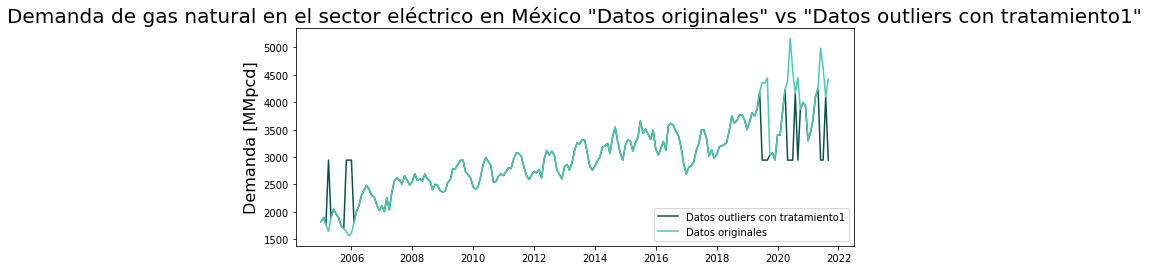

In [33]:
plt.figure(figsize=(10,4))
plt.plot(demanda_electrico_tratamiento1_train_data, color='#0B5345')
plt.plot(demanda_electrico_original_train_data, color='#48C9B0')
plt.title('Demanda de gas natural en el sector eléctrico en México "Datos originales" vs "Datos outliers con tratamiento1"', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)
# Add a legend to the left bottom corner
plt.legend(['Datos outliers con tratamiento1', 'Datos originales'], loc='lower right', fontsize=10)


Se grafica la distribución de Demanda de gas natural en el sector eléctrico "Datos outliers con tratamiento1"

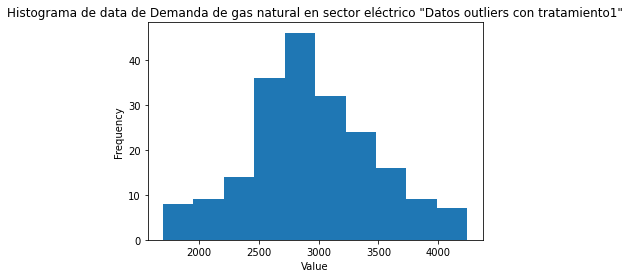

In [34]:
# Generate the histogram
plt.hist(demanda_electrico_tratamiento1_train_data, bins=10)  # Adjust the number of bins as per your data

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograma de data de Demanda de gas natural en sector eléctrico "Datos outliers con tratamiento1"')

# Display the plot
plt.show()

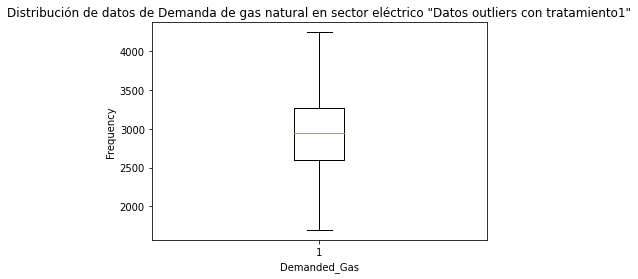

In [35]:
# Create a boxplot of the Demanded_Gas column
plt.boxplot(demanda_electrico_tratamiento1_train_data)

# Add labels and title
plt.xlabel('Demanded_Gas')
plt.ylabel('Frequency')
plt.title('Distribución de datos de Demanda de gas natural en sector eléctrico "Datos outliers con tratamiento1"')

# Display the plot
plt.show()

Se muestran las gráficas de ACF y PACF de la Demanda de gas natural en el sector eléctrico en México con los "Datos outliers con tratamiento1"

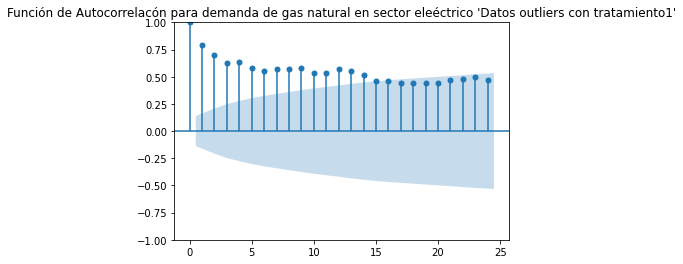

In [36]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(demanda_electrico_tratamiento1_train_data.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para demanda de gas natural en sector eleéctrico 'Datos outliers con tratamiento1'")

# Show the plot
plt.show()

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


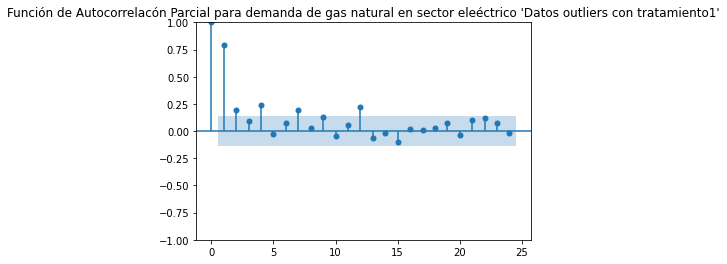

In [37]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(demanda_electrico_tratamiento1_train_data.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para demanda de gas natural en sector eleéctrico 'Datos outliers con tratamiento1'")

# Show the plot
plt.show()

Se lleva a cabo la prueba Dickey Fulley para la serie de demanda_electrico_tratamiento1_train_data 

In [38]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Perform ADF test for stationarity
adf_test_demanda_electrico_tratamiento1_train_data = adfuller(demanda_electrico_tratamiento1_train_data)


adf_test_demanda_electrico_tratamiento1_train_data

(-1.1674638525703216,
 0.687433065014806,
 11,
 189,
 {'1%': -3.4654311561944873,
  '5%': -2.8769570530458792,
  '10%': -2.574988319755886},
 2587.340568073859)

In [40]:

print(f"The ADF statistic value f is: {adf_test_demanda_electrico_tratamiento1_train_data[0]}")

print(f"The ADF p value p is: {adf_test_demanda_electrico_tratamiento1_train_data[1]}")

if adf_test_demanda_electrico_tratamiento1_train_data[0] < adf_test_demanda_electrico_tratamiento1_train_data[4]['5%']:
      print("Se rechaza H0: SI existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de SI estacionariedad")
else:
    print("Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de NO estacionariedad")

The ADF statistic value f is: -1.1674638525703216
The ADF p value p is: 0.687433065014806
Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de NO estacionariedad


También para este caso  se muestran las gráficas de ACF y PACF de la DIFERENCIA de Demanda de gas natural en el sector eléctrico en México


In [41]:
demanda_electrico_tratamiento1_diff1 = demanda_electrico_tratamiento1_train_data.diff()
demanda_electrico_tratamiento1_diff1

Date
2005-01-01            NaN
2005-02-01      75.750000
2005-03-01    -129.470000
2005-04-01    1178.356952
2005-05-01   -1048.676952
                 ...     
2021-05-01     139.110000
2021-06-01   -1299.713048
2021-07-01       0.000000
2021-08-01    1154.593048
2021-09-01   -1154.593048
Name: Demanded_Gas, Length: 201, dtype: float64

Histograma de data de Demanda de gas natural en sector eléctrico "Datos outliers con tratamiento1" DIFERENCIA 1

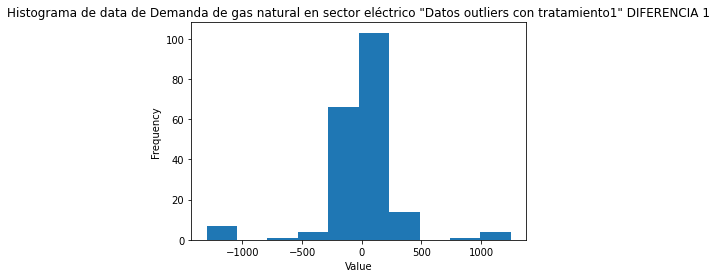

In [42]:
# Generate the histogram
plt.hist(demanda_electrico_tratamiento1_diff1.dropna(), bins=10)  # Adjust the number of bins as per your data

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograma de data de Demanda de gas natural en sector eléctrico "Datos outliers con tratamiento1" DIFERENCIA 1')

# Display the plot
plt.show()

Se lleva a cabo la prueba Dickey Fulley para la serie de demanda_electrico_tratamiento1_train_data con una diferencia 

In [43]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Perform ADF test for stationarity
adf_test_demanda_electrico_tratamiento1_train_data_diff1 = adfuller(demanda_electrico_tratamiento1_diff1.dropna())


adf_test_demanda_electrico_tratamiento1_train_data_diff1

(-6.518615852472467,
 1.055865744285777e-08,
 11,
 188,
 {'1%': -3.465620397124192,
  '5%': -2.8770397560752436,
  '10%': -2.5750324547306476},
 2573.4576689312335)

In [44]:
print(f"The ADF statistic value f is: {adf_test_demanda_electrico_tratamiento1_train_data_diff1[0]}")

print(f"The ADF p value p is: {adf_test_demanda_electrico_tratamiento1_train_data_diff1[1]}")

if adf_test_demanda_electrico_tratamiento1_train_data_diff1[0] < adf_test_demanda_electrico_tratamiento1_train_data_diff1[4]['5%']:
     print("Se rechaza H0: SI existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de SI estacionariedad")
else:
    print("Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de NO estacionariedad")

The ADF statistic value f is: -6.518615852472467
The ADF p value p is: 1.055865744285777e-08
Se rechaza H0: SI existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de SI estacionariedad


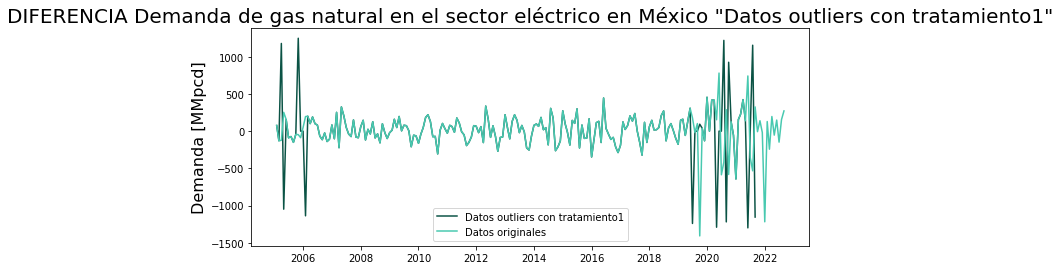

In [47]:
plt.figure(figsize=(10,4))
plt.plot(demanda_electrico_tratamiento1_diff1, color='#0B5345')
plt.plot(demanda_electrico_original_diff1, color='#48C9B0')
plt.title('DIFERENCIA Demanda de gas natural en el sector eléctrico en México "Datos outliers con tratamiento1"', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)
plt.legend(['Datos outliers con tratamiento1', 'Datos originales'], loc='lower center', fontsize=10)

Se muestran las gráficas de ACF y PACF de la DIFERENCIA de Demanda de gas natural en el sector eléctrico en México con los "Datos outliers con tratamiento1"

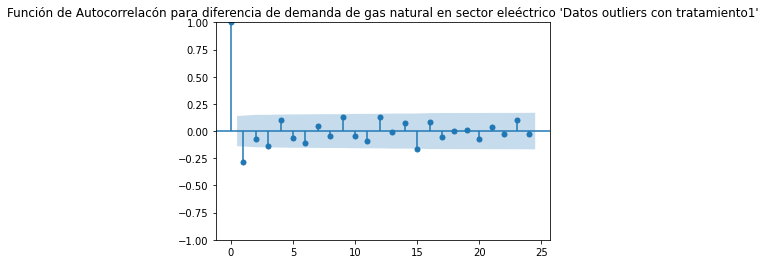

In [48]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(demanda_electrico_tratamiento1_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para diferencia de demanda de gas natural en sector eleéctrico 'Datos outliers con tratamiento1'")

# Show the plot
plt.show()

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


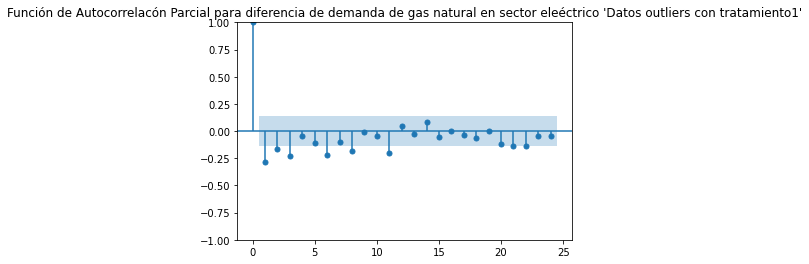

In [49]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(demanda_electrico_tratamiento1_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para diferencia de demanda de gas natural en sector eleéctrico 'Datos outliers con tratamiento1'")

# Show the plot
plt.show()

Apliquemos un modelo ARIMA a nuestra data de Demanda de gas natural en sector eléctrico 'Datos outliers con tratamiento1'

In [50]:
##Create the model
model_ARIMA_electrico_tratamiento1 = ARIMA (demanda_electrico_tratamiento1_train_data, order=(3,1,3))

##Fit the model
start = time()
model_ARIMA_electrico_tratamiento1_fit = model_ARIMA_electrico_tratamiento1.fit()
end = time()
print('Model fitting time', end-start)

##Summary of the model 
print(model_ARIMA_electrico_tratamiento1_fit.summary())


c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Model fitting time 0.615976095199585
                               SARIMAX Results                                
Dep. Variable:           Demanded_Gas   No. Observations:                  201
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1411.450
Date:                Fri, 29 Sep 2023   AIC                           2836.900
Time:                        13:24:36   BIC                           2859.988
Sample:                    01-01-2005   HQIC                          2846.243
                         - 09-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1542      0.077    -15.078      0.000      -1.304      -1.004
ar.L2         -0.1835      0.127     -1.450      0.147      -0.432       0.065
ar.L3          

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [51]:
##get prediction start and end dates 
pred_model_ARIMA_electrico_start_date = demanda_electrico_original_test_data.index[0]
pred_model_ARIMA_electrico_end_date = demanda_electrico_original_test_data.index[-1]


In [52]:
##get the predictors and residuals 
predictions_model_ARIMA_electrico_tratamiento1 = model_ARIMA_electrico_tratamiento1_fit.predict(start=pred_model_ARIMA_electrico_start_date, end= pred_model_ARIMA_electrico_end_date)
print(predictions_model_ARIMA_electrico_tratamiento1)

2021-10-01    3318.446337
2021-11-01    3253.094529
2021-12-01    3547.356237
2022-01-01    3353.666834
2022-02-01    3499.833857
2022-03-01    3472.005937
2022-04-01    3407.966216
2022-05-01    3539.313841
2022-06-01    3389.498598
2022-07-01    3515.391538
2022-08-01    3444.594087
2022-09-01    3449.577655
Freq: MS, Name: predicted_mean, dtype: float64


Text(0, 0.5, 'Demanda [MMpcd]')

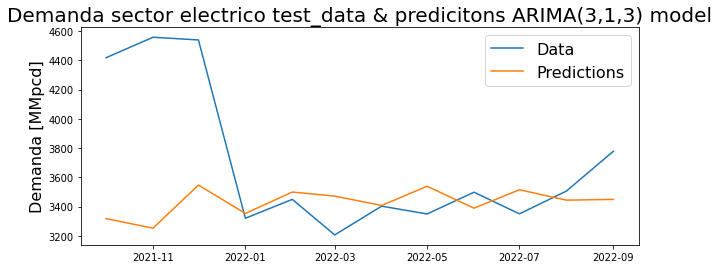

In [53]:

##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_original_test_data['Demanded_Gas'])
plt.plot(predictions_model_ARIMA_electrico_tratamiento1)
plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Demanda sector electrico test_data & predicitons ARIMA(3,1,3) model', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Observamos el MAPEy RMSE de demanda_electrico_original_test_data['Demanded_Gas'] vs predictions_model_ARIMA_electrico_tratamiento1

In [54]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute errors
MAPE_predictions_model_ARIMA_electrico_tratamiento1 = mean_absolute_percentage_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_tratamiento1)
RMSE_predictions_model_ARIMA_electrico_tratamiento1 = np.sqrt(mean_squared_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_tratamiento1))

print('MAPE:', MAPE_predictions_model_ARIMA_electrico_tratamiento1)
print('RMSE:', RMSE_predictions_model_ARIMA_electrico_tratamiento1)

MAPE: 0.091938709013092
RMSE: 588.2714729034742


Text(0, 0.5, 'Demanda [MMpcd]')

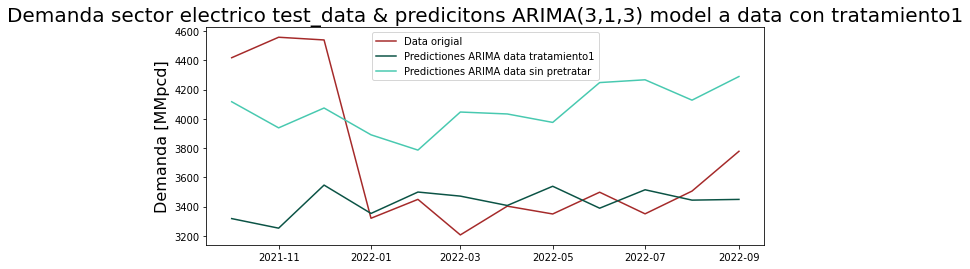

In [62]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_original_test_data['Demanded_Gas'], color='brown')
plt.plot(predictions_model_ARIMA_electrico_tratamiento1, color='#0B5345')
plt.plot(predictions_model_ARIMA_electrico_original, color='#48C9B0')
plt.legend(('Data origial', 'Predictiones ARIMA data tratamiento1', 'Predictiones ARIMA data sin pretratar'), fontsize=10)

plt.title('Demanda sector electrico test_data & predicitons ARIMA(3,1,3) model a data con tratamiento1', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Vamos a entrenar un segundo modelo 

In [63]:
##Create the model
model_ARIMA_electrico_tratamiento1_v2 = ARIMA (demanda_electrico_tratamiento1_train_data, order=(2,1,3))

##Fit the model
start = time()
model_ARIMA_electrico_tratamiento1_v2_fit = model_ARIMA_electrico_tratamiento1_v2.fit()
end = time()
print('Model fitting time', end-start)

##Summary of the model 
print(model_ARIMA_electrico_tratamiento1_v2_fit.summary())


c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Model fitting time 0.382948637008667
                               SARIMAX Results                                
Dep. Variable:           Demanded_Gas   No. Observations:                  201
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1415.670
Date:                Fri, 29 Sep 2023   AIC                           2843.340
Time:                        13:34:25   BIC                           2863.130
Sample:                    01-01-2005   HQIC                          2851.349
                         - 09-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7844      0.096     -8.133      0.000      -0.973      -0.595
ar.L2         -0.2980      0.107     -2.788      0.005      -0.508      -0.088
ma.L1          

In [64]:
##get the predictors and residuals 
predictions_model_ARIMA_electrico_tratamiento1_v2 = model_ARIMA_electrico_tratamiento1_v2_fit.predict(start=pred_model_ARIMA_electrico_start_date, end= pred_model_ARIMA_electrico_end_date)
print(predictions_model_ARIMA_electrico_tratamiento1_v2)

2021-10-01    3040.252569
2021-11-01    3190.092501
2021-12-01    3754.630386
2022-01-01    3267.160395
2022-02-01    3481.299828
2022-03-01    3458.592972
2022-04-01    3412.592124
2022-05-01    3455.441278
2022-06-01    3435.538659
2022-07-01    3438.381387
2022-08-01    3442.082403
2022-09-01    3438.332245
Freq: MS, Name: predicted_mean, dtype: float64


Text(0, 0.5, 'Demanda [MMpcd]')

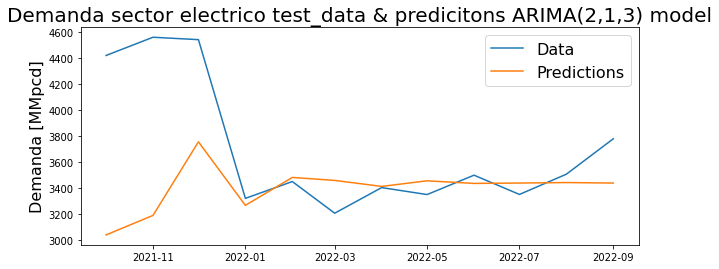

In [65]:

##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_original_test_data['Demanded_Gas'])
plt.plot(predictions_model_ARIMA_electrico_tratamiento1_v2)
plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Demanda sector electrico test_data & predicitons ARIMA(2,1,3) model', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Observamos el MAPEy RMSE de demanda_electrico_original_test_data['Demanded_Gas'] vs predictions_model_ARIMA_electrico_tratamiento1_v2

In [66]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute errors
MAPE_predictions_model_ARIMA_electrico_tratamiento1_v2 = mean_absolute_percentage_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_tratamiento1_v2)
RMSE_predictions_model_ARIMA_electrico_tratamiento1_v2 = np.sqrt(mean_squared_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_tratamiento1_v2))

print('MAPE:', MAPE_predictions_model_ARIMA_electrico_tratamiento1_v2)
print('RMSE:', RMSE_predictions_model_ARIMA_electrico_tratamiento1_v2)

MAPE: 0.08957857176534918
RMSE: 618.5396262654643


Text(0, 0.5, 'Demanda [MMpcd]')

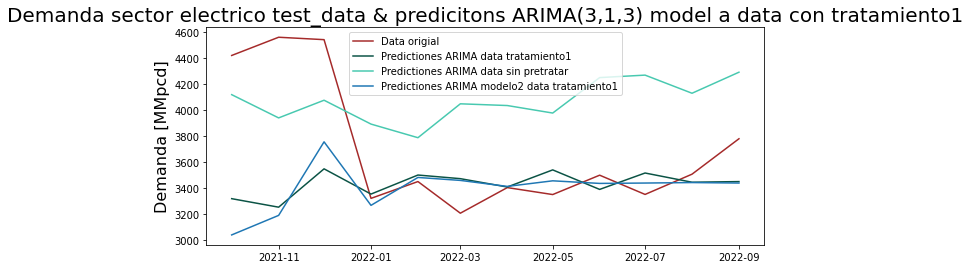

In [68]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_original_test_data['Demanded_Gas'], color='brown')
plt.plot(predictions_model_ARIMA_electrico_tratamiento1, color='#0B5345')
plt.plot(predictions_model_ARIMA_electrico_original, color='#48C9B0')
plt.plot(predictions_model_ARIMA_electrico_tratamiento1_v2)
plt.legend(('Data origial', 'Predictiones ARIMA data tratamiento1', 'Predictiones ARIMA data sin pretratar', 'Predictiones ARIMA modelo2 data tratamiento1'), fontsize=10)

plt.title('Demanda sector electrico test_data & predicitons ARIMA(3,1,3) model a data con tratamiento1', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

### Proceso de substutución por la media y/o mediana + normalización como forma de abordar los valores atípicos de la serie 

Vamos a entrenar el miMax escaler 

In [109]:
demanda_electrico_tratamiento1_train_data

Date
2005-01-01    1819.580000
2005-02-01    1895.330000
2005-03-01    1765.860000
2005-04-01    2944.216952
2005-05-01    1895.540000
                 ...     
2021-05-01    4243.930000
2021-06-01    2944.216952
2021-07-01    2944.216952
2021-08-01    4098.810000
2021-09-01    2944.216952
Name: Demanded_Gas, Length: 201, dtype: float64

In [110]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Create a MinMaxScaler object and fit it to the training data
MinMax_scaler_data_pre_tratada = MinMaxScaler()
MinMax_scaler_data_pre_tratada.fit(demanda_electrico_tratamiento1_train_data.values.reshape(-1, 1))


MinMaxScaler()

In [112]:
# Transform both the training and test data using the trained scaler
demanda_electrico_con_tratamiento1_scaled_train_data = MinMax_scaler_data_pre_tratada.transform(demanda_electrico_tratamiento1_train_data.values.reshape(-1, 1))
demanda_electrico_con_tratamiento1_scaled_train_data

array([[0.04853199],
       [0.07826107],
       [0.02744887],
       [0.48991054],
       [0.07834349],
       [0.13963838],
       [0.10444621],
       [0.07603581],
       [0.01694656],
       [0.        ],
       [0.48991054],
       [0.48991054],
       [0.48991054],
       [0.04333186],
       [0.12204034],
       [0.16184787],
       [0.23664742],
       [0.27588589],
       [0.30796582],
       [0.28145886],
       [0.23648651],
       [0.22683977],
       [0.17209116],
       [0.12953638],
       [0.1620598 ],
       [0.12201286],
       [0.22099599],
       [0.13371219],
       [0.26132551],
       [0.34195313],
       [0.36205117],
       [0.34671371],
       [0.31825228],
       [0.37728266],
       [0.34617211],
       [0.31140773],
       [0.3345395 ],
       [0.39186267],
       [0.34528514],
       [0.35492011],
       [0.34026162],
       [0.38998277],
       [0.35425685],
       [0.33985345],
       [0.27822497],
       [0.31705527],
       [0.30887241],
       [0.270

In [114]:
import pandas as pd
import numpy as np

# Assuming your data has 201 data points
date_range = pd.date_range(start='2005-01-01', periods=201, freq='M')  # Adjust the start date as needed
demanda_electrico_con_tratamiento1_scaled_train_data_index = pd.DataFrame({'scaled_demand': demanda_electrico_con_tratamiento1_scaled_train_data.flatten()}, index=date_range)
demanda_electrico_con_tratamiento1_scaled_train_data_index

,scaled_demand
2005-01-31,0.048532
2005-02-28,0.078261
2005-03-31,0.027449
2005-04-30,0.489911
2005-05-31,0.078343
...,...
2021-05-31,1.000000
2021-06-30,0.489911
2021-07-31,0.489911
2021-08-31,0.943046


In [115]:
##Create the model
model_ARIMA_electrico_pretratamiento_e_normalize = ARIMA (demanda_electrico_con_tratamiento1_scaled_train_data_index, order=(3,1,3))

##Fit the model
start = time()
model_ARIMA_electrico_pretratamiento_e_normalize_fit = model_ARIMA_electrico_pretratamiento_e_normalize.fit()
end = time()
print('Model fitting time', end-start)

##Summary of the model 
print(model_ARIMA_electrico_pretratamiento_e_normalize_fit.summary())

Model fitting time 0.6781518459320068
                               SARIMAX Results                                
Dep. Variable:          scaled_demand   No. Observations:                  201
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 159.036
Date:                Fri, 29 Sep 2023   AIC                           -304.071
Time:                        15:02:46   BIC                           -280.983
Sample:                    01-31-2005   HQIC                          -294.728
                         - 09-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2083      0.077    -15.634      0.000      -1.360      -1.057
ar.L2         -0.0458      0.136     -0.338      0.736      -0.312       0.220
ar.L3         

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [116]:
# Make predictions
predictions_model_ARIMA_electrico_pretratamiento_e_normalize = model_ARIMA_electrico_pretratamiento_e_normalize_fit.predict(start=pred_model_ARIMA_electrico_start_date, end=pred_model_ARIMA_electrico_end_date)

In [117]:
predictions_model_ARIMA_electrico_pretratamiento_e_normalize


2021-10-31    0.687139
2021-11-30    0.550961
2021-12-31    0.767571
2022-01-31    0.607106
2022-02-28    0.725457
2022-03-31    0.694167
2022-04-30    0.649241
2022-05-31    0.761978
2022-06-30    0.612744
2022-07-31    0.766250
2022-08-31    0.641925
2022-09-30    0.713211
Freq: M, Name: predicted_mean, dtype: float64

In [119]:
predictions_model_ARIMA_electrico_pretratamiento_e_normalize.values

array([0.68713946, 0.55096102, 0.76757075, 0.60710572, 0.72545692,
       0.69416735, 0.6492408 , 0.76197809, 0.61274368, 0.76624964,
       0.641925  , 0.71321093])

In [118]:
predictions_model_ARIMA_electrico_pretratamiento_e_normalize_rescale = MinMax_scaler_data_pre_tratada.inverse_transform(predictions_model_ARIMA_electrico_pretratamiento_e_normalize.values.reshape(-1, 1))
predictions_model_ARIMA_electrico_pretratamiento_e_normalize_rescale

array([[3446.75822484],
       [3099.77418811],
       [3651.69794235],
       [3242.83144297],
       [3544.39147918],
       [3464.6653412 ],
       [3350.1920493 ],
       [3637.44779677],
       [3257.19702605],
       [3648.33175371],
       [3331.55130742],
       [3513.18859047]])

In [120]:
demanda_electrico_original_test_data['Demanded_Gas'].values

array([4417.51, 4557.36, 4538.89, 3320.75, 3449.8 , 3206.96, 3403.44,
       3350.03, 3498.7 , 3350.97, 3506.42, 3778.37])

Text(0, 0.5, 'Demanda [MMpcd]')

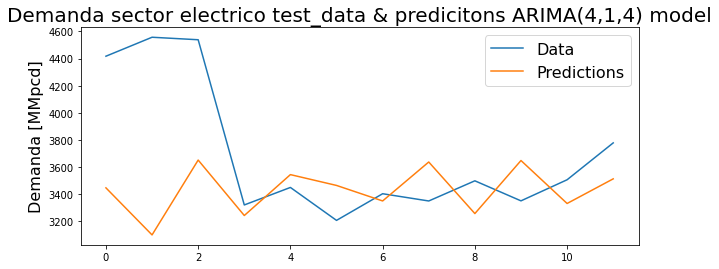

In [121]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_original_test_data['Demanded_Gas'].values)
plt.plot(predictions_model_ARIMA_electrico_pretratamiento_e_normalize_rescale)
plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Demanda sector electrico test_data & predicitons ARIMA(4,1,4) model', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Observamos el MAPEy RMSE de demanda_electrico_original_test_data['Demanded_Gas'] vs predictions_model_ARIMA_electrico_normalize_original_rescale

In [122]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np
# Compute errors
MAPE_predictions_model_ARIMA_electrico_pretratamiento_e_normalize_rescale = mean_absolute_percentage_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_pretratamiento_e_normalize_rescale)
RMSE_predictions_model_ARIMA_electrico_pretratamiento_e_normalize_rescale = np.sqrt(mean_squared_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_pretratamiento_e_normalize_rescale))

print('MAPE:', MAPE_predictions_model_ARIMA_electrico_pretratamiento_e_normalize_rescale)
print('RMSE:', RMSE_predictions_model_ARIMA_electrico_pretratamiento_e_normalize_rescale)

MAPE: 0.10379581735910737
RMSE: 596.416264048229


##  Proceso de substutución por la media y/o mediana + normalización +  AUTOARIMA  

In [127]:
import pmdarima as pm

# Obtain the recommended order of the ARIMA model
best_model = pm.auto_arima(demanda_electrico_con_tratamiento1_scaled_train_data_index)

# Instantiate the ARIMA model with the recommended order
model_ARIMA_electrico_pretratamiento_e_normalize = ARIMA(
    demanda_electrico_con_tratamiento1_scaled_train_data_index, order=best_model.order
)

# Fit the model
model_ARIMA_electrico_pretratamiento_e_normalize_fit_autorima = model_ARIMA_electrico_pretratamiento_e_normalize.fit()

##Summary of the model 
print(model_ARIMA_electrico_pretratamiento_e_normalize_fit_autorima.summary())

                               SARIMAX Results                                
Dep. Variable:          scaled_demand   No. Observations:                  201
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 148.221
Date:                Fri, 29 Sep 2023   AIC                           -290.442
Time:                        15:05:42   BIC                           -280.547
Sample:                    01-31-2005   HQIC                          -286.438
                         - 09-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5524      0.052    -10.697      0.000      -0.654      -0.451
ma.L2         -0.2752      0.053     -5.196      0.000      -0.379      -0.171
sigma2         0.0132      0.001     11.903      0.0

In [128]:
##get the predictors and residuals 
predictions_model_ARIMA_electrico_pretratamiento_e_normalize_fit_autorima = model_ARIMA_electrico_pretratamiento_e_normalize_fit_autorima.predict(start=pred_model_ARIMA_electrico_start_date, end= pred_model_ARIMA_electrico_end_date)
print(predictions_model_ARIMA_electrico_pretratamiento_e_normalize_fit_autorima)

2021-10-31    0.601520
2021-11-30    0.695064
2021-12-31    0.695064
2022-01-31    0.695064
2022-02-28    0.695064
2022-03-31    0.695064
2022-04-30    0.695064
2022-05-31    0.695064
2022-06-30    0.695064
2022-07-31    0.695064
2022-08-31    0.695064
2022-09-30    0.695064
Freq: M, Name: predicted_mean, dtype: float64


In [130]:
predictions_model_ARIMA_electrico_pretratamiento_e_normalize_fit_autorima_rescale = MinMax_scaler_data_pre_tratada.inverse_transform(predictions_model_ARIMA_electrico_pretratamiento_e_normalize_fit_autorima.values.reshape(-1, 1))
predictions_model_ARIMA_electrico_pretratamiento_e_normalize_fit_autorima_rescale

array([[3228.59978565],
       [3466.95003063],
       [3466.95003063],
       [3466.95003063],
       [3466.95003063],
       [3466.95003063],
       [3466.95003063],
       [3466.95003063],
       [3466.95003063],
       [3466.95003063],
       [3466.95003063],
       [3466.95003063]])

Text(0, 0.5, 'Demanda [MMpcd]')

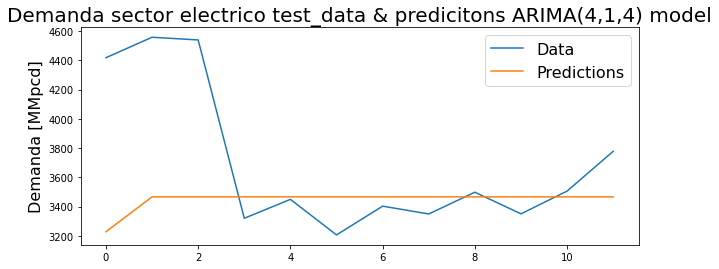

In [131]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_original_test_data['Demanded_Gas'].values)
plt.plot(predictions_model_ARIMA_electrico_pretratamiento_e_normalize_fit_autorima_rescale)
plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Demanda sector electrico test_data & predicitons ARIMA(4,1,4) model', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)